# **Maestría en Inteligencia Artificial Aplicada**

## **Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## **Actividad 9: Modelos de predicción con modelos recurrentes**

### Javier Rebull
### A01795838


# Objetivo:
##### El desarrollo de esta actividad contribuye al cumplimiento de los objetivos del tema de Aprendizaje Profundo, modelos Secuenciales o Recurrentes y Series de Tiempo.


# **Introducción**

En esta actividad, hemos seleccionado las acciones de **Apple Inc. (AAPL)** para nuestro análisis de series de tiempo y predicción utilizando modelos recurrentes. Elegimos Apple porque es una de las empresas más valiosas y reconocidas a nivel mundial. Fundada en 1976, Apple ha revolucionado la industria tecnológica con productos innovadores como el iPhone, iPad y MacBook, y ha mantenido una trayectoria de crecimiento sostenido en su valor de mercado.

## **Valoración actual y proyecciones futuras**

A octubre de 2023, Apple continúa siendo una de las compañías con mayor capitalización bursátil en el mundo, superando los **2 billones de dólares**. Su sólida posición financiera y su capacidad para innovar constantemente la han posicionado como líder en el sector tecnológico. Con el creciente enfoque en servicios como Apple Music, Apple TV+ y la expansión en áreas como inteligencia artificial y realidad aumentada, los analistas proyectan que Apple seguirá experimentando un crecimiento significativo en el futuro. Estas proyecciones positivas hacen que sus acciones sean de gran interés para inversores y analistas financieros.

## **Obtención de datos y variables utilizadas**

Para llevar a cabo nuestro análisis, descargamos los datos históricos del precio de las acciones de Apple utilizando la biblioteca `yfinance`, que nos permite acceder fácilmente a información financiera desde Yahoo Finance. Nos enfocamos en los datos de los últimos cinco años para obtener una perspectiva actual y relevante del comportamiento de las acciones.

## En este estudio, utilizamos dos variables clave:

1. **Fecha (`Date` o `ds`):** Representa la fecha correspondiente a cada registro del precio de la acción. Esta variable es esencial para el análisis de series de tiempo, ya que nos permite ordenar cronológicamente los datos y detectar tendencias, patrones estacionales y ciclos en el comportamiento de la acción.

2. **Precio de Cierre Ajustado (`Adj Close` o `y`):** Este valor refleja el precio de cierre de la acción ajustado por eventos corporativos como dividendos, divisiones de acciones (splits) o emisiones de derechos. El **Precio de Cierre Ajustado** proporciona una visión más precisa del rendimiento histórico de la acción, ya que incorpora los ajustes necesarios para reflejar el valor real que un inversor habría obtenido si hubiera mantenido la acción durante ese período. Al utilizar esta variable, eliminamos distorsiones causadas por eventos corporativos y nos enfocamos en las variaciones genuinas del mercado.

Al analizar estas variables, buscamos construir modelos predictivos que nos permitan comprender y anticipar el comportamiento futuro de las acciones de Apple, aprovechando técnicas de aprendizaje automático y análisis de series de tiempo.

---

# **0 - Preparando los datos**

In [12]:
# Omitamos los Warnings por el momento:
import warnings
warnings.filterwarnings("ignore")

In [13]:
#!pip freeze   # Si deseas verificar qué librerías y versiones ya tiene google-Colab preinstaladas,
               # en particular "prophet" que usaremos en este ejercicio.

In [14]:
# Manipulación y Análisis de Datos
import numpy as np     # Librería para cálculos numéricos y científicos en Python, especialmente útil para trabajar con arreglos y matrices.
import pandas as pd    # Librería para manipulación y análisis de datos, permite trabajar con estructuras como DataFrames para organizar y limpiar datos.

# Visualización de Datos
import matplotlib.pyplot as plt    # Módulo de visualización que permite generar gráficos de líneas, dispersión, barras, etc., para interpretar los datos.

# Evaluación de Modelos
from sklearn.metrics import mean_squared_error    # Métrica para evaluar modelos de regresión, calcula el error cuadrático medio entre valores reales y predicciones.
import math    # Módulo estándar de matemáticas, proporciona funciones básicas como sqrt, sin, cos, etc., para cálculos aritméticos complementarios.

# Modelado de Series Temporales
from prophet import Prophet    # Librería de Facebook para modelado de series temporales con tendencia y estacionalidad, simplifica la predicción de series temporales.

# Gráficos y Análisis de Series Temporales con Statsmodels
from statsmodels.graphics.tsaplots import month_plot, quarter_plot    # Funciones para visualizar patrones estacionales mensuales y trimestrales en datos temporales.
from statsmodels.tsa.seasonal import seasonal_decompose    # Descompone series temporales en tendencia, estacionalidad y residuales para entender patrones subyacentes.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   # Gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) para analizar la dependencia en diferentes rezagos.

# Obtención de Datos Financieros
import yfinance as yf    # Biblioteca para descargar datos financieros históricos (acciones, divisas, etc.) desde Yahoo Finance, útil para análisis financiero.

#Trabajar Dias Feriados de USA
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# **Obteniendo información de Yahoo Finance**

In [16]:
ticker_symbol = 'AAPL'   # selecciona las iniciales de la compañía deseada.
data = yf.download(ticker_symbol, period='5y')   # Se indica el período y descargamos.
data.to_csv('historical_data.csv')   # Guardamos los datos

[*********************100%***********************]  1 of 1 completed


In [17]:
path = 'historical_data.csv'
df = pd.read_csv(path, header=0)
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-11 00:00:00+00:00,63.54957962036133,65.55000305175781,65.61750030517578,64.56999969482422,64.57499694824219,81821200
3,2019-11-12 00:00:00+00:00,63.49140548706055,65.48999786376953,65.69750213623047,65.2300033569336,65.38749694824219,87388800
4,2019-11-13 00:00:00+00:00,64.0997543334961,66.11750030517578,66.19499969482422,65.26750183105469,65.28250122070312,102734400


In [18]:
df.info()   # La columna que nos interesa Adj Close y Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [7]:
print(df.columns) #Obteniendo las columnas del DataFrame

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [19]:
# Reseteamos el índice para obtener 'Date' como columna
data = data.reset_index()

# Seleccionamos las columnas 'Date' y 'Adj Close'
df = data[['Date', 'Adj Close']]

print(df.columns) #Obteniendo las columnas del DataFrame Nuevamente

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL')],
           names=['Price', 'Ticker'])


In [20]:
# Renombremos de manera estándar las columnas de fechas y valores de la
# serie de tiempo, donde además la fecha la trasnformamos a tipo datetime:

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

df.head()

,ds,y
0,2019-11-11 00:00:00+00:00,63.549580
1,2019-11-12 00:00:00+00:00,63.491405
2,2019-11-13 00:00:00+00:00,64.099754
3,2019-11-14 00:00:00+00:00,63.656231
4,2019-11-15 00:00:00+00:00,64.412407


In [21]:
df.columns = ['ds', 'y'] # Dejando Ahora solo dos columnas: 'Date (ds)' y 'Adj Close (y)'.

In [23]:
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None) #Convertir la columna 'ds' a datetime y eliminar la zona horaria:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ds      1258 non-null   datetime64[ns, UTC]
 1   y       1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 19.8 KB


In [24]:
# Mostrar los primeros registros del DataFrame
print(df.head())

          ds          y
0 2019-11-11  63.549580
1 2019-11-12  63.491405
2 2019-11-13  64.099754
3 2019-11-14  63.656231
4 2019-11-15  64.412407


In [26]:
# Mostrar los últimos registros del DataFrame
print(df.tail(20))

             ds           y
1238 2024-10-14  231.045807
1239 2024-10-15  233.593002
1240 2024-10-16  231.525269
1241 2024-10-17  231.894867
1242 2024-10-18  234.741730
1243 2024-10-21  236.220108
1244 2024-10-22  235.600800
1245 2024-10-23  230.506393
1246 2024-10-24  230.316620
1247 2024-10-25  231.155685
1248 2024-10-28  233.143494
1249 2024-10-29  233.413193
1250 2024-10-30  229.847122
1251 2024-10-31  225.661728
1252 2024-11-01  222.665024
1253 2024-11-04  221.766006
1254 2024-11-05  223.204422
1255 2024-11-06  222.475235
1256 2024-11-07  227.229996
1257 2024-11-08  226.960007


En particular datetime64[ns] nos ayuda a representar un rango de fechas muy amplio (del año 1678 al 2262) con precisión de nanosegundos.

### **Agreguemos los ajustes usuales en Series de tiempo:**

In [27]:
# Hagamos una copia del DataFrame df con índices temporales:
df_temp = df.copy()  # Crea una copia del DataFrame original 'df' y la asigna a 'df_temp'
df_temp.set_index('ds', inplace=True)  # Establece la columna 'ds' como índice del DataFrame 'df_temp'
df_temp  # Muestra el DataFrame 'df_temp' con el índice 'ds' establecido

,y
ds,
2019-11-11,63.549580
2019-11-12,63.491405
2019-11-13,64.099754
2019-11-14,63.656231
2019-11-15,64.412407
...,...
2024-11-04,221.766006
2024-11-05,223.204422
2024-11-06,222.475235


In [30]:
# Imprime la forma (número de filas y columnas) del DataFrame original
print(f"Shape of original DataFrame df: {df.shape}")

# Imprime la forma (número de filas y columnas) del DataFrame ajustado con días hábiles en EE.UU.
print(f"Shape of DataFrame df_temp (business days in the US): {df_temp.shape}")

Shape of original DataFrame df: (1258, 2)
Shape of DataFrame df_temp (business days in the US): (1258, 1)


https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [31]:
# Ajustemos la frecuencia de los índices, para que el modelo tenga información del período en que
# se encuentran los datos:

df_temp.index  # Observamos que aquí todavía no se tiene información del argumento "freq"

DatetimeIndex(['2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20',
               '2019-11-21', '2019-11-22',
               ...
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08'],
              dtype='datetime64[ns]', name='ds', length=1258, freq=None)

Para las opciones de "freq" ver la tabla que viene en esta liga:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [33]:
# Crear un calendario de días hábiles que excluya los días festivos de EE.UU.
us_business_days = CustomBusinessDay(calendar=USFederalHolidayCalendar())

# Cambiar la frecuencia del índice a días hábiles según el calendario de EE.UU.
df_temp = df_temp.asfreq(us_business_days, method='pad')  # 'pad' llena valores faltantes con el dato anterior

# Asegúrate de que el índice de df_temp esté configurado como un índice de fechas de días hábiles en EE.UU.
df_temp.index = pd.to_datetime(df_temp.index)  # Convertimos el índice en fechas si no lo está ya

df_temp.index

DatetimeIndex(['2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-25',
               ...
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08'],
              dtype='datetime64[ns]', name='ds', length=1251, freq='C')

En este caso observamos que, freq='C' indica que el índice está usando una frecuencia de “CustomBusinessDay” (día hábil personalizado). Esto ocurre porque utilizamos CustomBusinessDay con un calendario específico de días hábiles (en este caso, los días laborables en EE.UU. que excluyen los festivos federales y fines de semana).

Esta frecuencia personalizada significa que:

	•	Solo se incluyen los días considerados hábiles según el calendario USFederalHolidayCalendar.
	•	Se excluyen fines de semana y festivos federales de EE.UU.

Así, freq='C' confirma que el índice de df_temp se ha ajustado a días hábiles de EE.UU.

In [35]:
# Verificar y mostrar la frecuencia del índice de df_temp
print("Frecuencia del índice en df_temp (días hábiles en EE.UU., excluyendo festivos):", df_temp.index.freq)

Frecuencia del índice en df_temp (días hábiles en EE.UU., excluyendo festivos): <CustomBusinessDay>


In [38]:
# Particionemos en conjuntos de entrenamiento y prueba, considerando aproximadamente un año de días hábiles en EE.UU.

# Seleccionamos todas las filas excepto las últimas 252 para el conjunto de entrenamiento.
train = df_temp.iloc[0:-252, :]

# Seleccionamos las últimas 252 filas para el conjunto de prueba, que representan aproximadamente un año laboral.
test = df_temp.iloc[-252:, :]

In [40]:
# Mostrar las dimensiones del conjunto de datos de entrenamiento
print(f"Dimensiones del conjunto de entrenamiento (train): {train.shape[0]} filas y {train.shape[1]} columnas")

Dimensiones del conjunto de entrenamiento (train): 999 filas y 1 columnas


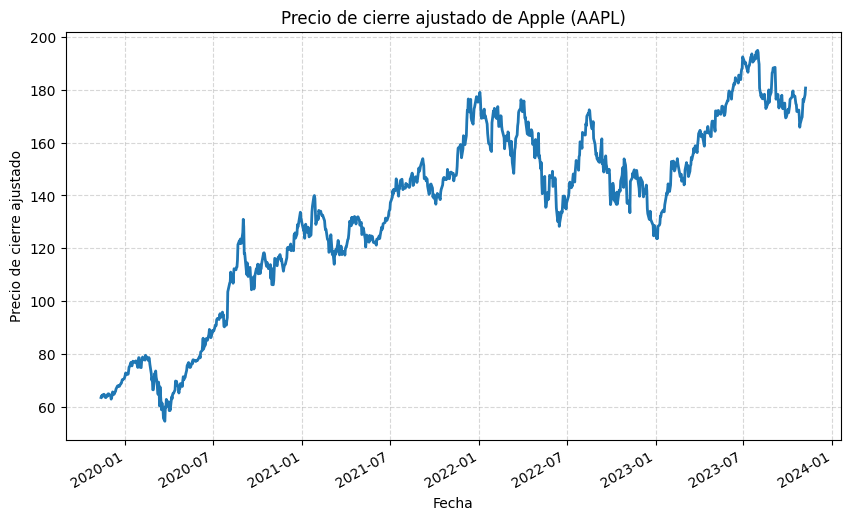

In [42]:
# Gráfico del precio de cierre ajustado de las acciones de Apple en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
train['y'].plot(title='Precio de cierre ajustado de Apple (AAPL)', color='#1f77b4', linewidth=2)  # Azul elegante

# Etiquetas y formato
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Precio de cierre ajustado')  # Etiqueta del eje Y
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula ligera para mejorar la legibilidad
plt.show()

De este gráfico podemos observar:

Observando el gráfico de los precios de cierre ajustados de Apple (AAPL), podemos hacer las siguientes observaciones:



*   Tendencia creciente: Existe una tendencia alcista en los precios de cierre ajustados de Apple durante el período observado. Esto indica que, en general, el valor de las acciones de Apple ha aumentado con el tiempo.
*   Estacionalidad y variabilidad: Aunque no es tan evidente como en algunos otros tipos de datos, parece haber cierta variabilidad estacional, con patrones repetitivos en los picos y caídas anuales. Sin embargo, la amplitud de esta variabilidad parece aumentar con el tiempo.
*   Modelo adecuado: Un modelo multiplicativo podría ser más adecuado que uno aditivo para analizar esta serie temporal. Esto se debe a que la amplitud de la variabilidad aumenta junto con el valor de la tendencia, es decir, las oscilaciones parecen hacerse más grandes a medida que el precio sube.

Estas observaciones sugieren que, al modelar esta serie temporal, sería útil considerar la tendencia creciente y el posible aumento en la variabilidad estacional en cualquier predicción futura.



# **Explicación de la Variable Adj Close**

La variable Adj Close o y representa el precio de cierre ajustado de las acciones de Apple (AAPL), que es el valor final de la acción al final de cada día hábil en el mercado. A diferencia del precio de cierre simple, el “ajustado” toma en cuenta eventos corporativos como dividendos, divisiones de acciones y otras acciones que afectan el valor, proporcionando una visión más precisa y consistente de la evolución del valor real de la acción para los inversores a largo plazo.

##**Importancia de Adj Close en el Análisis**

Esta variable es crucial en el análisis de series temporales para la predicción de precios de acciones y otras aplicaciones en finanzas, porque:



*   Refleja el verdadero valor de mercado: Al estar ajustado por eventos corporativos, elimina distorsiones y facilita una comparación precisa en el tiempo.
*   Permite identificar tendencias y patrones: Como se observa en el gráfico, la serie temporal de Adj Close muestra una tendencia creciente, lo que indica un interés y confianza del mercado en el crecimiento de Apple.
*   Aporta información para estrategias de inversión: Analizar esta variable ayuda a prever posibles fluctuaciones y a tomar decisiones de inversión más informadas.

##**Observaciones en el Contexto de Apple**

En el contexto de Apple, el precio de cierre ajustado nos muestra cómo el valor de la empresa ha evolucionado en el mercado a través de los años, evidenciando tendencias de crecimiento o caídas en respuesta a innovaciones, cambios en el mercado o movimientos estratégicos de la empresa. La tendencia creciente y el aumento de la variabilidad observada en el gráfico sugieren que esta acción es dinámica y responde activamente tanto a factores internos de la empresa como a influencias externas del mercado.

Esta variable, por tanto, no solo es el núcleo del análisis de series temporales en esta tarea, sino que es fundamental para comprender el comportamiento del mercado en relación con Apple y proyectar su posible evolución en el futuro.

# **1 - Modelo ingenuo (Baseline / Persistance / Naive model)**

*   El modelo ingenuo simplemente hace la predicción del siguiente perídodo, repitiendo el valor del último período.

*   Este modelo se utiliza en general como punto de partida para comparar todos los demás,

*   Utilicemos el error RMSE (Raíz del Error Cuadrático Medio) como medida del desempeño de nuestros modelos a obtener.

# **Parte 1: Datos sin escalar**

## 1A: Preparación de los datos

In [ ]:
# Omitimos los warnings por el momento
import warnings
warnings.filterwarnings("ignore")

# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importamos las métricas y modelos
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Si no tienes yfinance instalado, descomenta la siguiente línea
# !pip install yfinance

import yfinance as yf

# Descargamos los datos de Apple Inc. (AAPL) de los últimos 5 años
ticker_symbol = 'AAPL'
data = yf.download(ticker_symbol, period='5y')

# Utilizamos solo la columna 'Adj Close'
df = data[['Adj Close']].reset_index()

# Renombramos las columnas para facilitar el manejo
df.columns = ['ds', 'y']

# Convertimos la columna 'ds' a tipo datetime
df['ds'] = pd.to_datetime(df['ds'])

# Visualizamos los primeros registros
df.head()


[*********************100%***********************]  1 of 1 completed


,ds,y
0,2019-11-05 00:00:00+00:00,62.202579
1,2019-11-06 00:00:00+00:00,62.229172
2,2019-11-07 00:00:00+00:00,62.947392
3,2019-11-08 00:00:00+00:00,63.119667
4,2019-11-11 00:00:00+00:00,63.619499


# **Explicación de 'Adj Close':**

### La columna 'Adj Close' (Precio de Cierre Ajustado) representa el precio de cierre de una acción después de ajustar por acciones corporativas que afectan su precio, como dividendos, divisiones de acciones (splits) o emisiones de derechos. Este ajuste proporciona una visión más precisa del rendimiento histórico de una acción, reflejando el valor real que un inversor habría obtenido si hubiera mantenido la acción durante ese período.

# **División de los datos en Train y Test**

In [ ]:
# Dividimos los datos en Train y Test
# Usaremos los últimos 20 precios para Test
train = df.iloc[:-20]
test = df.iloc[-20:]

print("Tamaño del conjunto de entrenamiento:", train.shape)
print("Tamaño del conjunto de prueba:", test.shape)

Tamaño del conjunto de entrenamiento: (1238, 2)
Tamaño del conjunto de prueba: (20, 2)


# **1B: Modelo ingenuo**

### El modelo ingenuo (Naive) utiliza el valor más reciente para predecir el siguiente valor. Es un punto de partida simple para comparar con otros modelos.

In [ ]:
# Obtenemos los valores históricos de entrenamiento
history = [x for x in train['y']]
predictions_naive = []

# Realizamos las predicciones
for i in range(len(test)):
    yhat = history[-1]
    predictions_naive.append(yhat)
    obs = test.iloc[i]['y']
    history.append(obs)
    print(f'>Esperado: {obs:.2f}, Predicción: {yhat:.2f}')

# Calculamos el RMSE
rmse_naive = np.sqrt(mean_squared_error(test['y'], predictions_naive))
print(f'\nError del Modelo Ingenuo (RMSE): {rmse_naive:.3f}')

>Esperado: 225.77, Predicción: 221.69
>Esperado: 229.54, Predicción: 225.77
>Esperado: 229.04, Predicción: 229.54
>Esperado: 227.55, Predicción: 229.04
>Esperado: 231.30, Predicción: 227.55
>Esperado: 233.85, Predicción: 231.30
>Esperado: 231.78, Predicción: 233.85
>Esperado: 232.15, Predicción: 231.78
>Esperado: 235.00, Predicción: 232.15
>Esperado: 236.48, Predicción: 235.00
>Esperado: 235.86, Predicción: 236.48
>Esperado: 230.76, Predicción: 235.86
>Esperado: 230.57, Predicción: 230.76
>Esperado: 231.41, Predicción: 230.57
>Esperado: 233.40, Predicción: 231.41
>Esperado: 233.67, Predicción: 233.40
>Esperado: 230.10, Predicción: 233.67
>Esperado: 225.91, Predicción: 230.10
>Esperado: 222.91, Predicción: 225.91
>Esperado: 222.01, Predicción: 222.91

Error del Modelo Ingenuo (RMSE): 2.645


# **Gráfico de Predicciones vs Datos Reales**

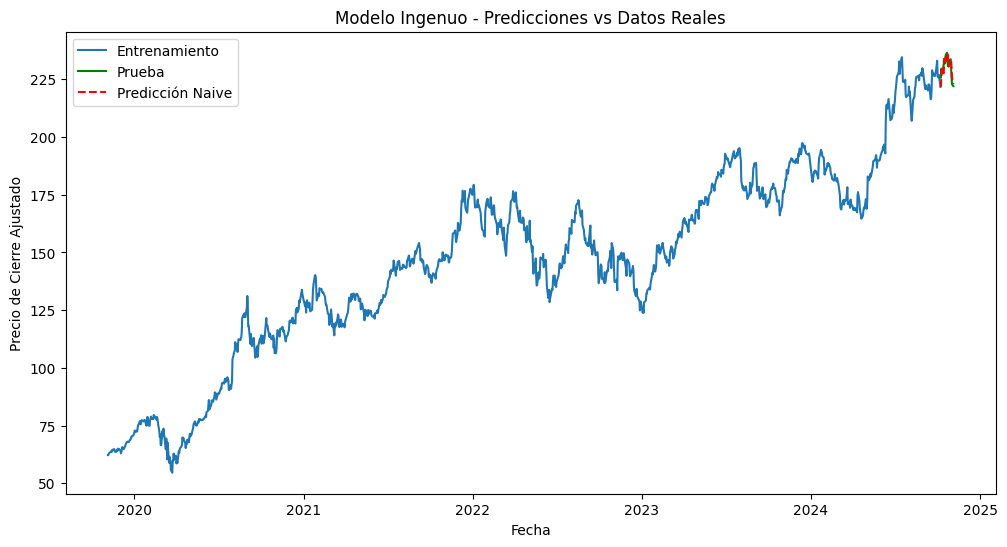

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Entrenamiento')
plt.plot(test['ds'], test['y'], label='Prueba', color='green')
plt.plot(test['ds'], predictions_naive, label='Predicción Naive', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.title('Modelo Ingenuo - Predicciones vs Datos Reales')
plt.legend()
plt.show()

# **1C: Modelo ARIMA**

### ARIMA es un modelo estadístico que utiliza componentes autorregresivas y de media móvil para modelar series de tiempo.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Verificamos la estacionariedad de la serie
result = adfuller(train['y'])
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

# Si la serie no es estacionaria, la diferenciamos
train_diff = train['y'].diff().dropna()

# Ajustamos el modelo ARIMA
model_arima = ARIMA(train['y'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Realizamos las predicciones
forecast_arima = model_arima_fit.forecast(steps=len(test))
rmse_arima = np.sqrt(mean_squared_error(test['y'], forecast_arima))
print(f'\nError del Modelo ARIMA (RMSE): {rmse_arima:.3f}')

Estadístico ADF: -1.3024290642123098
Valor p: 0.6280602823976479

Error del Modelo ARIMA (RMSE): 9.517


# **Gráfico de Predicciones vs Datos Reales**

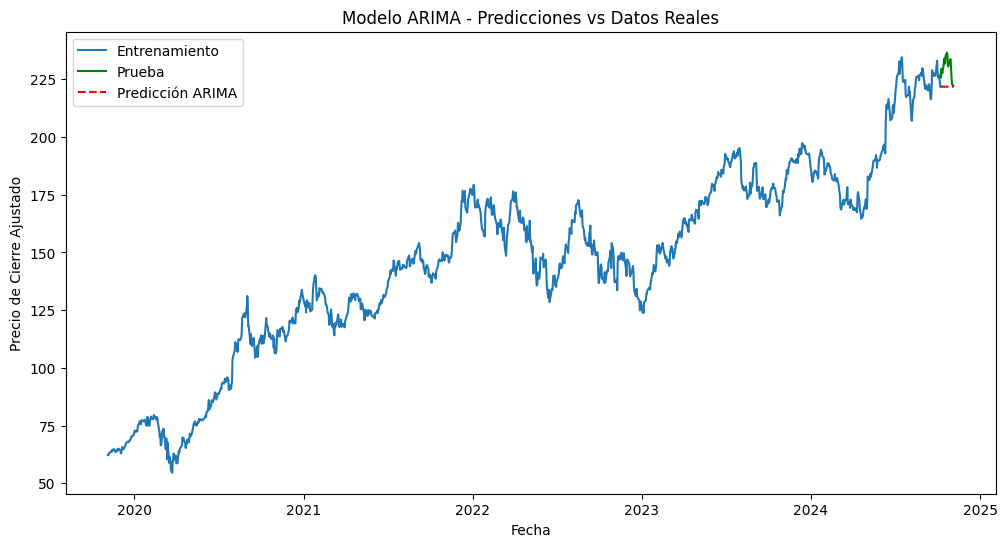

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Entrenamiento')
plt.plot(test['ds'], test['y'], label='Prueba', color='green')
plt.plot(test['ds'], forecast_arima, label='Predicción ARIMA', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.title('Modelo ARIMA - Predicciones vs Datos Reales')
plt.legend()
plt.show()

# **1D: Modelo Prophet**

### Prophet es una herramienta de Facebook para el pronóstico de series de tiempo que maneja automáticamente componentes como tendencias y estacionalidades.

In [ ]:
# Eliminamos la información de zona horaria
train['ds'] = train['ds'].dt.tz_localize(None)
test['ds'] = test['ds'].dt.tz_localize(None)

# Ajustamos el modelo Prophet
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(train)

# Realizamos las predicciones
future = model_prophet.make_future_dataframe(periods=len(test))
forecast_prophet = model_prophet.predict(future)

# Extraemos las predicciones correspondientes al conjunto de prueba
predictions_prophet = forecast_prophet.iloc[-len(test):]['yhat']
rmse_prophet = np.sqrt(mean_squared_error(test['y'], predictions_prophet))
print(f'\nError del Modelo Prophet (RMSE): {rmse_prophet:.3f}')

DEBUG:cmdstanpy:input tempfile: /tmp/tmp__ib1p1x/dk48hxne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp__ib1p1x/x9xb_yxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86881', 'data', 'file=/tmp/tmp__ib1p1x/dk48hxne.json', 'init=/tmp/tmp__ib1p1x/x9xb_yxt.json', 'output', 'file=/tmp/tmp__ib1p1x/prophet_modelpgi07ly4/prophet_model-20241105045201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:52:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:52:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Error del Modelo Prophet (RMSE): 8.180


# **Gráfico de Predicciones vs Datos Reales**

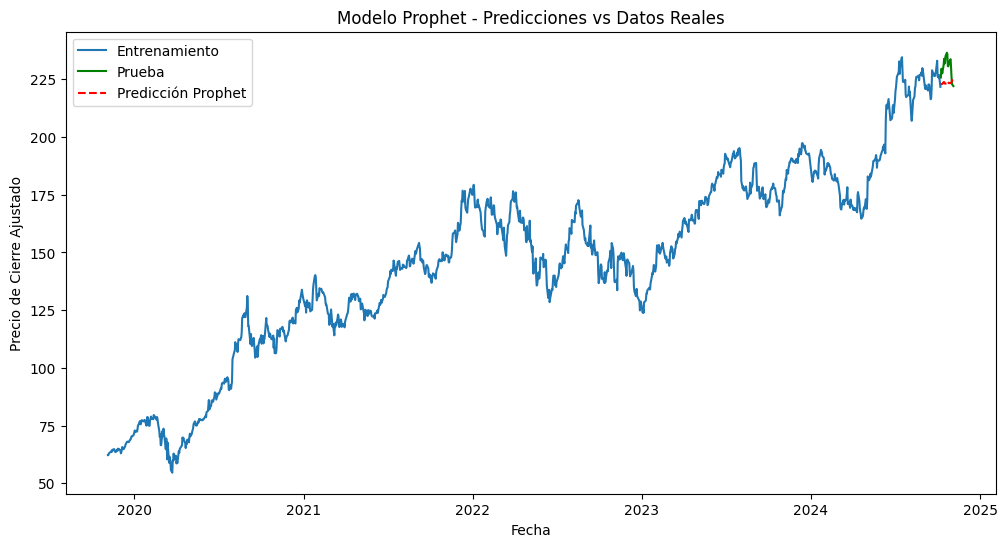

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Entrenamiento')
plt.plot(test['ds'], test['y'], label='Prueba', color='green')
plt.plot(test['ds'], predictions_prophet, label='Predicción Prophet', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.title('Modelo Prophet - Predicciones vs Datos Reales')
plt.legend()
plt.show()

# **1E: Modelo LSTM**

### Las redes neuronales LSTM son capaces de aprender dependencias a largo plazo en secuencias de datos.

In [ ]:
# Preparación de los datos para LSTM
from sklearn.preprocessing import MinMaxScaler

# Convertimos los datos a numpy arrays
train_lstm = train['y'].values
test_lstm = test['y'].values

# Reshape para aplicar el escalador
train_lstm = train_lstm.reshape(-1, 1)
test_lstm = test_lstm.reshape(-1, 1)

# Escalamos los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_lstm)

# Creamos las secuencias de entrenamiento
X_train = []
y_train = []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape para LSTM [samples, time_steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Construimos el modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

# Compilamos el modelo
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.1039
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0060
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0042
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0040
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0043
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0038
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0041
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0035
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0035
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0036
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0035
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0034
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0031
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0031
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0030
Epoc

# Realizamos las predicciones

In [ ]:
# Preparación de los datos de prueba
total_data = pd.concat((train['y'], test['y']), axis=0)
inputs = total_data[len(total_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 60 + len(test)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicciones
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Calculamos el RMSE
rmse_lstm = np.sqrt(mean_squared_error(test['y'], predictions_lstm))
print(f'\nError del Modelo LSTM (RMSE): {rmse_lstm:.3f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Error del Modelo LSTM (RMSE): 4.732


# **Gráfico de Predicciones vs Datos Reales**

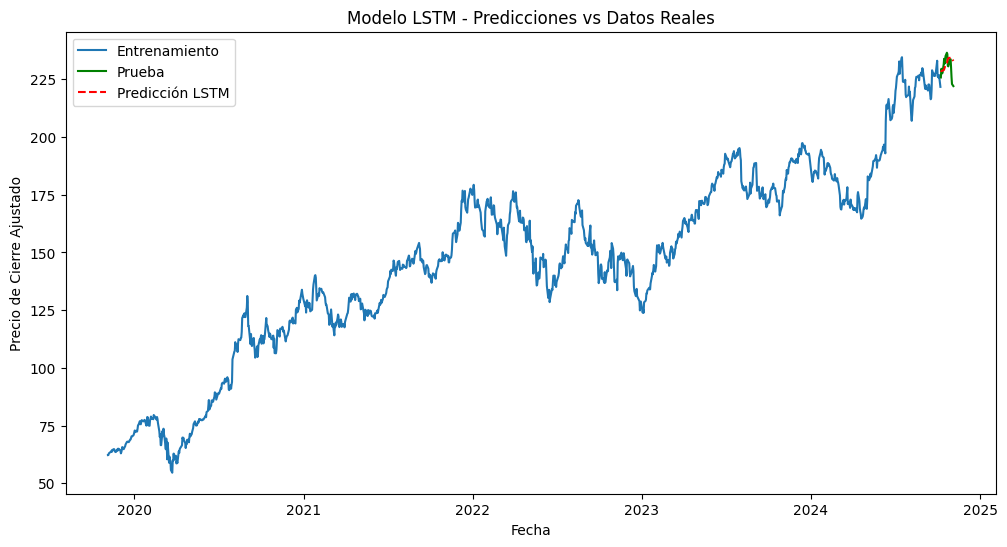

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Entrenamiento')
plt.plot(test['ds'], test['y'], label='Prueba', color='green')
plt.plot(test['ds'], predictions_lstm, label='Predicción LSTM', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.title('Modelo LSTM - Predicciones vs Datos Reales')
plt.legend()
plt.show()

>> ## **Fin del Ejercicio de Series de Tiempo - Actividad 9: Modelos de predicción con modelos recurrentes**